In [24]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.integrate import quad
from scipy.interpolate import interp1d

from blade_design import blade_design, airfoil_path, process_file
from bemt import coefficients_extrapolation

### Blade Design with diferent section's distribution

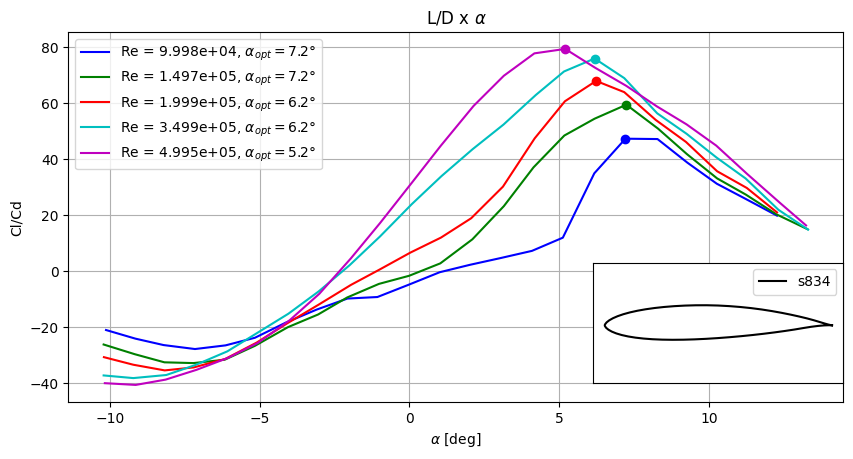

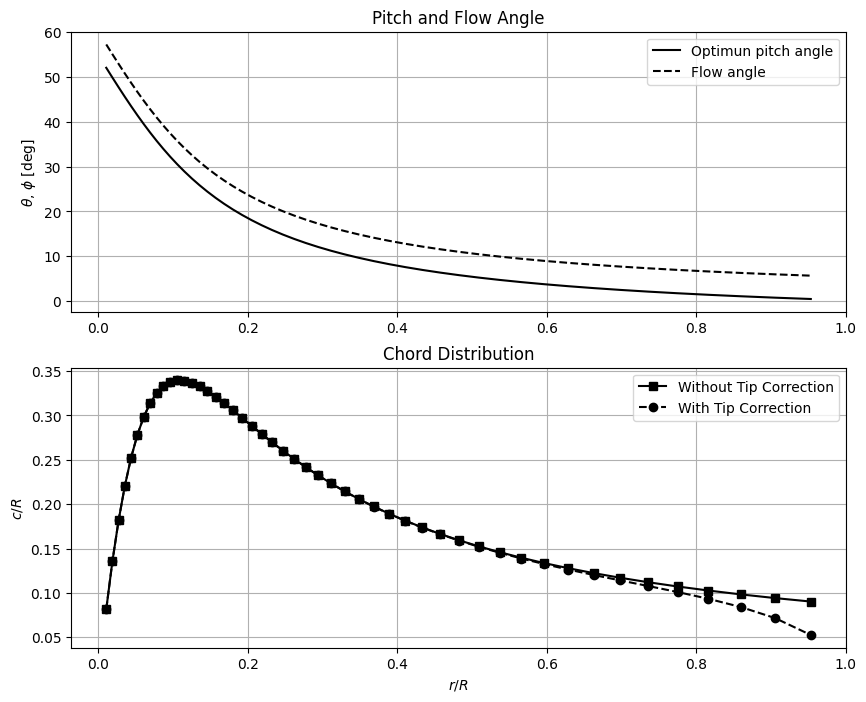

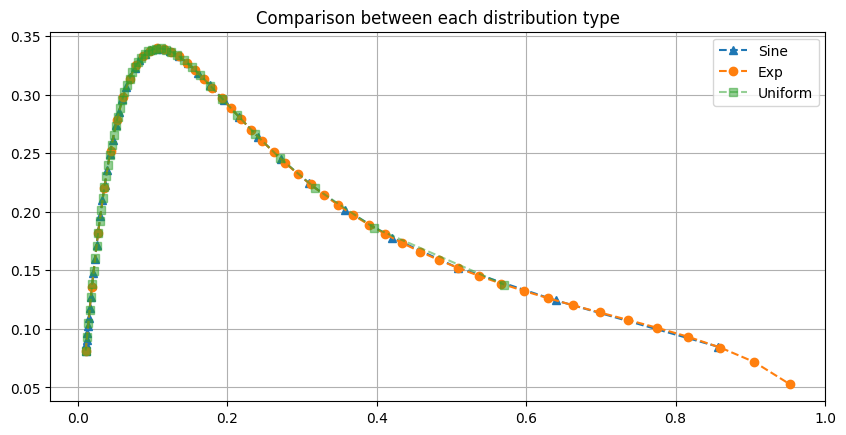

In [2]:
rotor_uniform = blade_design('s834', 7, 2, number_of_sections=50,plot=False)
rotor_sine = blade_design('s834', 7, 2, number_of_sections=50, section_distribution='sine', plot=False)
rotor_exp = blade_design('s834', 7, 2, number_of_sections=50, section_distribution='exp', plot=True)

# %% Comparison between each distribution type
plt.figure(figsize=[10, 4.8])

plt.plot(rotor_sine['r/R'],rotor_sine['c/R']*rotor_sine['Tip Correction'], '^--',label = 'Sine')
plt.plot(rotor_exp['r/R'],rotor_exp['c/R']*rotor_exp['Tip Correction'], 'o--',label = 'Exp')
plt.plot(rotor_uniform['r/R'],rotor_uniform['c/R']*rotor_uniform['Tip Correction'], 's--',alpha = 0.5, label = 'Uniform')

plt.title('Comparison between each distribution type')

plt.grid()
plt.legend()
plt.show()

### Validate Cp curve for Optimum Blade design

157
233
263
277
285
289
292
293
295
296
296
297
297
297
298
298
298
298
298
299
[0.28790016 0.30455574 0.27596512 0.24392589 0.21770697 0.19324718
 0.17480837 0.15601938 0.14490026 0.13370134 0.12154667 0.11458559
 0.10577131 0.09821622 0.09474579 0.08882417 0.08359922 0.07895482
 0.0747993  0.07420126]


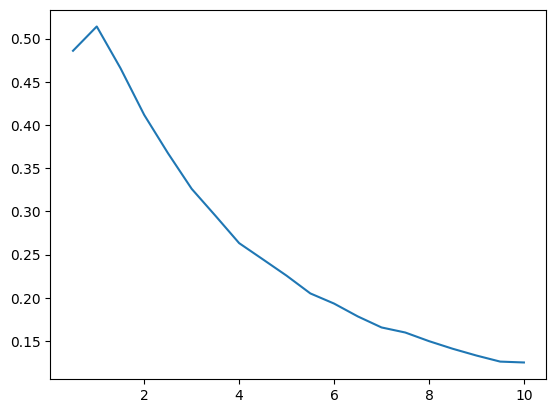

In [36]:
rotor_2 = blade_design('s834', 10, 2, number_of_sections=300, plot=False, tip_correction_model='')

TSR = np.arange(0.5, 10.5,  0.5)
Cp = np.zeros(len(TSR))
for i, tsr in enumerate(TSR):
    cond = rotor_2['x']/tsr <= 1
    a = rotor_2['a'][cond].to_numpy() 
    a_line = rotor_2['a_line'][cond].to_numpy() 
    x = rotor_2['x'][cond].to_numpy() 
    
    # func = interp1d(np.linspace(0, tsr, len(a)), a_line*(1 -a) *x**3, kind='cubic')
    # Cp[i] = 8/(tsr**2) * quad(func, 0, tsr)[0]
    Cp[i] = 8*tsr**2 * np.trapezoid(a_line*(1 - a)*x**3, np.linspace(0, 1, len(x)))

plt.plot(TSR, Cp*27/16)
plt.show()

### Coefficients Extrapolation

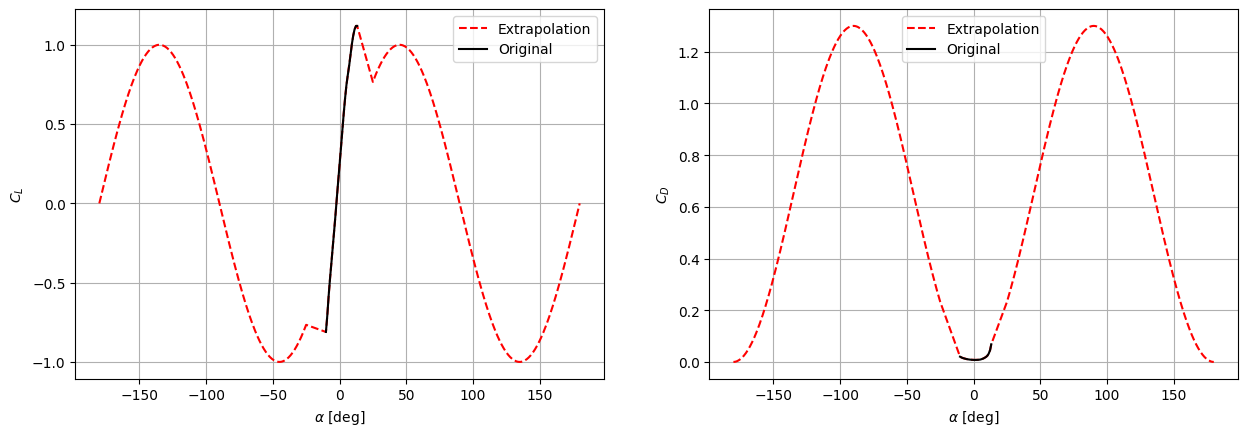

In [4]:
airfoil_name = 's834'
c_lift_drag = process_file(airfoil_path.joinpath(f'{airfoil_name}_c_drg.txt'))
re = max(c_lift_drag, key = lambda x: float(x.split()[-1]))

df_extra = coefficients_extrapolation(c_lift_drag[re][0], rotor_exp)
# alpha = np.deg2rad(np.concatenate((np.linspace(-90, -15, 100), np.linspace(15, 90, 100))))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = [15, 4.8])

ax1.plot(df_extra['alpha'],  df_extra['Cl'], 'r--', label = 'Extrapolation')
ax1.plot(c_lift_drag[re][0][:, 0],  c_lift_drag[re][0][:, 1], 'k',  label = 'Original')

ax1.set_xlabel(r'$\alpha$ [deg]')
ax1.set_ylabel(r'$C_L$')
ax1.legend()
ax1.grid()

ax2.plot(df_extra['alpha'],  df_extra['Cd'], 'r--', label = 'Extrapolation')
ax2.plot(c_lift_drag[re][0][:, 0],  c_lift_drag[re][0][:, 2], 'k', label = 'Original')

ax2.set_xlabel(r'$\alpha$ [deg]')
ax2.set_ylabel(r'$C_D$')
ax2.legend()
ax2.grid()

plt.show()

